# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('https://bit.ly/fish_csv_data')
data.tail(2)

,Species,Weight,Length,Diagonal,Height,Width
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [4]:
print(data['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


- np arr로 안 바꾸면 밑에 `print(y_train[indexes])` 코드에서 에러
  - 이유는.. 그냥 받아들이기로 함..
  - np arr로 안 바꿀거면 밑에서 `print(y_train.values[indexes])`로 쓰면 해결되긴 함
  - np는 DL에서 pd는 ML에서 애용
  - df보다 np arr 속도가 더 빠르다

In [5]:
x = data[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  # df를 np arr로 변환
print(x[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
y = data['Species'].to_numpy()  # Series를 np arr로 변환
print(y[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [7]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split  # train, test셋 분리
from sklearn.preprocessing import StandardScaler  # 정규화

In [8]:
# train, test셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [9]:
## 정규화
# 모델 선언
ss = StandardScaler()

# 학습
ss.fit(x_train)

# 정규화
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

### k-최근접 이웃 분류기의 확률 예측

In [10]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# 모델 선언
model = KNeighborsClassifier(n_neighbors=3)  # n_neighbors 디폴트는 5

# 학습
model.fit(train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# 타겟의 클래스 확인
print(model.classes_)  # cf) sklearn 객체 속성 끝에 _가 붙어있으면 모델 클래스 만들 때 지정한 값이 아니라, 모델이 데이터로부터 학습한 특성일 경우에 _가 붙는다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 예측
y_pred = model.predict(test_scaled)
print(y_pred[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
import numpy as np

# 확률 출력
proba = model.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 4번째 샘플에 대한 이웃들(3개) 확인
distances, indexes = model.kneighbors(test_scaled[3:4])
print(type(indexes))
print(y_train[indexes])

<class 'numpy.ndarray'>
[['Roach' 'Perch' 'Perch']]


In [16]:
# 정답 확인
y_test[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [17]:
# 평가
print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.8907563025210085
0.85


In [18]:
# 평가2
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         2
       Perch       0.71      0.83      0.77        12
        Pike       1.00      1.00      1.00         4
       Roach       0.50      0.67      0.57         3
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.85        40
   macro avg       0.74      0.79      0.76        40
weighted avg       0.80      0.85      0.82        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 로지스틱회귀

In [19]:
import numpy as np
import matplotlib.pyplot as plt

###sigmoid 함수
$$ \large p = \frac{1}{(1 + e^{-z})} $$
<br>
cf) $ z = f(x) $ 로 선형판별식을 뜻한다.<br>
cf) model.predict()는 z값으로 판단, model.predict_proba()는 z값을 계산해서 p를 출력한다.

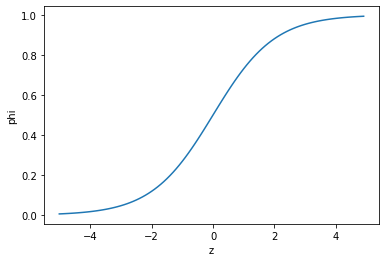

In [20]:
z = np.arange(-5, 5, 0.1)  # range 함수에는 정수 단위만 지원하나, np.arange는 실수 단위도 표현 가능  # range 메소드는 range iterator 자료형을 반환하고, np.arange 메소드는 numpy array 자료형을 반환
phi = 1 / (1 + np.exp(-z))  # numpy.exp(x) 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [21]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

bream_smelt_indexes = (y_train == 'Bream') | (y_train == 'Smelt')  # 도미 또는 빙어이면 True 아니면 False
train_bream_smelt = train_scaled[bream_smelt_indexes]  # True인 것만
target_bream_smelt = y_train[bream_smelt_indexes]  # True인 것만

['A' 'C']


In [22]:
# 확인
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [23]:
# # True인 것만 뽑혔는지 개수 확인
len(bream_smelt_indexes), len(train_bream_smelt)

(119, 33)

In [24]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression

In [25]:
# 모델 선언
lr = LogisticRegression()

# 학습하기
lr.fit(train_bream_smelt, target_bream_smelt)

# 예측하기
print(lr.predict(train_bream_smelt[:5]))  # model.predict()는 z값으로 판단

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [26]:
# 확률 확인
print(lr.predict_proba(train_bream_smelt[:5]))  # model.predict_proba()는 z값을 계산해서 p를 출력

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [27]:
# 클래스 확인
print(lr.classes_)

['Bream' 'Smelt']


### 로지스틱 회귀 계수 확인

In [28]:
# 가중치(기울기), 편향(절편) 확인
print(lr.coef_, lr.intercept_)

# z(f(x)) = -0.404*무게 -0.576*길이 -0.663*대각선 -0.013*높이 -0.732*두께 -2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [29]:
# sklearn의 대부분의 분류모델은 model.decision_function()을 제공하고 이는 z값을 출력해줌
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [30]:
# sigmoid함수를 위한 라이브러리 불러오기
from scipy.special import expit  # sigmoid함수를 제공함

In [31]:
print(expit(decisions))  # sigmoid함수를 거친 확률값 출력(이진 분류의 경우 양성의 확률만 출력)

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀(다중 분류)

In [32]:
# 선언하기 
# 로지스틱 회귀는 기본적으로 L2노름(norm) 규제를 적용, C↑ → 규제↓ / C↓ → 규제↑, 규제의 역수라고 표현
# cf) LinearRegression의 Ridge(릿지회귀, L2규제)에선 alpha↑ → 규제↑
lr = LogisticRegression(C=20, max_iter=1000)  # C는 규제강도 지정, 디폴트는 1 / max_iter는 반복횟수 지정, 디폴트는 100

# 학습하기
lr.fit(train_scaled, y_train)

LogisticRegression(C=20, max_iter=1000)

In [33]:
print(lr.score(train_scaled, y_train))  # 회귀모델일 경우 r2 score, 분류모델일 경우 accuracy
print(lr.score(test_scaled, y_test))

0.9327731092436975
0.925


In [34]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [35]:
print(lr.coef_.shape, lr.intercept_.shape)
# 7: 클래스, # 5: 특성에 곱해지는 계수
# => z값이 클래스마다 하나씩 만들어짐, 즉 7개의 선형함수가 만들어짐
# => 첫번째 샘플이 7개의 선형함수를 거쳐서 가장 큰 값이 예측 클래스가 된다.
# 이때 각각의 선형함수를 학습할 때는 OvR(One vs Rest 이진분류)을 실행한다.

(7, 5) (7,)


### 소프트맥스 함수

In [36]:
# sklearn의 대부분의 분류모델은 model.decision_function()을 제공하고 이는 z값을 출력해줌
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


└>
$
s1 = \frac{e^{z1}}{\sum^{7}_{i=1} e^{zi}},
s2 = \frac{e^{z2}}{\sum^{7}_{i=1} e^{zi}}, 
..., 
s7 = \frac{e^{z7}}{\sum^{7}_{i=1} e^{zi}} $

$s1+s2+s3+s4+s5+s6+s7 = 1$ <┐

In [37]:
# 다중분류를 위한 softmax함수 불러오기
from scipy.special import softmax

In [38]:
proba = softmax(decision, axis=1)  # z값을 지수함수에 적용하고 각각을 sum한 값으로 나눔, 행별 합이 1
print(np.round(proba, decimals=3))  # 위에서 출력한 확률값과 동일한 결과

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
